In [1]:
import sys
sys.path.append('../')

import porousmedialab.analytical_solutions as analytical_solutions
%matplotlib inline

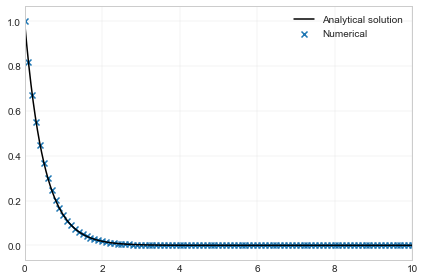

In [2]:
analytical_solutions.reaction_equation_plot()

Simulation started:
	 2017-12-09 00:44:31


Estimated time of the code execution:
	 0h:00m:03s
Will finish approx.:
	 2017-12-09 00:44:34


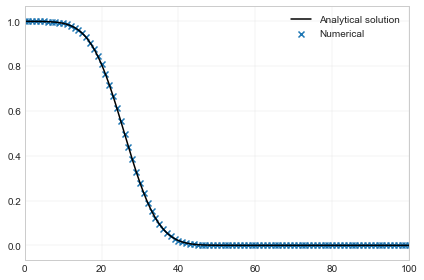

In [3]:
analytical_solutions.transport_equation_plot()

Simulation started:
	 2017-12-09 00:44:34


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2017-12-09 00:44:36


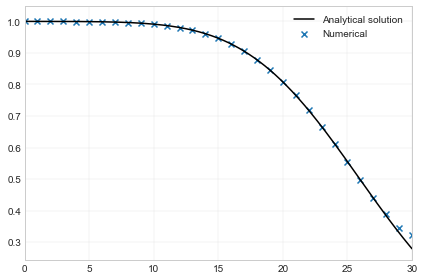

In [4]:
analytical_solutions.transport_equation_boundary_effect()